# <font color='blue'> The interview attendance problem
* Dataset information: https://www.kaggle.com/vishnusraghavan/the-interview-attendance-problem
* The data pertains to the recruitment industry in India for the years 2014-2016 and deals with candidate interview attendance for various clients.
* There are a set of questions that are asked by a recruiter while scheduling the candidate. The answers to these determine whether expected attendance is yes, no or uncertain.
* This dataset has 1234 rows, 28 columns which have 23 categorical columns and 6% of missing values.

## <font color='purple'> Project 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data set
interview=pd.read_csv("Interview.csv")
interview.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [3]:
# There are 1234 roaws and 28 columns
interview.shape

(1234, 28)

In [4]:
categorical = [var for var in interview.columns if interview[var].dtype=='O']
print('There are {} categorical columns\n'.format(len(categorical)))
print(categorical)

There are 23 categorical columns

['Date of Interview', 'Client name', 'Industry', 'Location', 'Position to be closed', 'Nature of Skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Have you obtained the necessary permission to start at the required time', 'Hope there will be no unscheduled meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same', 'Are you clear with the venue details and the landmark.', 'Has the call letter been shared', 'Expected Attendance', 'Observed Attendance', 'Marital Status']


In [5]:
# A quick overview of the dataset
# We can see that there are some missing values in this data set
interview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 28 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

In [6]:
# Summarize missing values
interview.isnull().sum()

Date of Interview                                                                                        1
Client name                                                                                              0
Industry                                                                                                 1
Location                                                                                                 1
Position to be closed                                                                                    1
Nature of Skillset                                                                                       1
Interview Type                                                                                           1
Name(Cand ID)                                                                                            1
Gender                                                                                                   1
Candidate Current Location           

### Data cleaning
* Remove the last 5 columns which do not have values
* Some values have missing values but they display Na, NA or na so we need to replace to Nan
* After the transform, there are 269 rows have missing values so we can not drop them
* Drop the last row (index=1233) which has missing values in each column
* Create a new label called no response for who did not respond to the questions
* Convert label names into unique names

In [7]:
# Remove the last 5 columns which do not have values
interview = interview.drop(columns=['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'])

In [8]:
# There are 6 percent missing values across the dataset
interview.isnull().sum().sum()/interview.size

0.060355154675498554

In [9]:
# List which rows have missing values
interview[interview.isna().any(axis=1)]

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
123,25.05.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 124,Female,Chennai,...,No,Yes,No,No,NaN,NaN,Yet to Check,Uncertain,Yes,Single
242,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 243,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
243,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 244,Female,Bangalore,...,No,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
244,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 245,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
245,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 246,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Married
247,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 248,Female,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
248,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 249,Female,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
251,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 252,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
254,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 255,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single


In [10]:
# Some values have missing values but they display Na, NA or na
interview.replace(to_replace=['Na', 'NA', 'na'], value=np.nan, inplace=True)

# Here still have 6 percent missing values across the dataset
interview.isnull().sum().sum()/(interview.shape[0]*interview.shape[1])

0.06475935452047073

In [11]:
interview.isnull().sum()

Date of Interview                                                                                       1
Client name                                                                                             0
Industry                                                                                                1
Location                                                                                                1
Position to be closed                                                                                   1
Nature of Skillset                                                                                      1
Interview Type                                                                                          1
Name(Cand ID)                                                                                           1
Gender                                                                                                  1
Candidate Current Location                    

In [12]:
# There are 269 rows have missing values so we can not drop them
# We can see that the last row (index=1233) has missing values in each column
# And most people did not respond from the 14th to the 20th question
interview[interview.isna().any(axis=1)]

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
123,25.05.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 124,Female,Chennai,...,No,Yes,No,No,NaN,NaN,Yet to Check,Uncertain,Yes,Single
242,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 243,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
243,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 244,Female,Bangalore,...,No,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
244,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 245,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
245,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 246,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Married
247,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 248,Female,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
248,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 249,Female,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
251,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 252,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
254,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Candidate 255,Male,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single


In [13]:
# Remove the last row (index=1233) which has missing values in each column
interview = interview.drop(interview.index[1233])
interview.tail()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
1228,07.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Candidate 1229,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Married
1229,07.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,Biosimiliars,Scheduled,Candidate 1230,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
1230,06.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,Biosimiliars,Scheduled,Candidate 1231,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Married
1231,06.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Candidate 1232,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
1232,06.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Candidate 1233,Female,Chennai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single


In [14]:
col_name = [j for j in interview.columns]
cat = [interview[i].unique() for i in interview.columns]

for i in range(len(interview.columns)):
    print(col_name[i])
    print(cat[i])
    print("")

Date of Interview
['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019'
 '12.04.2020' '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16'
 '19.03.16' '24.05.2016' '05/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2

In [15]:
for i in range(len(interview.columns)):
    print(col_name[i])
    print(len(cat[i]))

Date of Interview
96
Client name
15
Industry
7
Location
11
Position to be closed
7
Nature of Skillset
92
Interview Type
6
Name(Cand ID)
1233
Gender
2
Candidate Current Location
10
Candidate Job Location
7
Interview Venue
7
Candidate Native location
46
Have you obtained the necessary permission to start at the required time
7
Hope there will be no unscheduled meetings
7
Can I Call you three hours before the interview and follow up on your attendance for the interview
5
Can I have an alternative number/ desk number. I assure you that I will not trouble you too much
5
Have you taken a printout of your updated resume. Have you read the JD and understood the same
7
Are you clear with the venue details and the landmark.
6
Has the call letter been shared
11
Expected Attendance
8
Observed Attendance
8
Marital Status
2


In [16]:
# Convert label names into unique names
interview.loc[interview["Industry"].str.contains("IT"), "Industry"] = "IT Products and Services"
interview["Industry"].unique()

array(['Pharmaceuticals', 'IT Products and Services', 'BFSI',
       'Electronics', 'Telecom'], dtype=object)

In [17]:
interview['Location'] = interview['Location'].str.strip('- ')
interview.loc[interview["Location"].str.contains("Gurgaon"), "Location"] = "Gurgaon"
interview['Location'] = interview['Location'].str.capitalize()
interview["Location"].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', 'Cochin',
       'Noida'], dtype=object)

In [18]:
interview.loc[interview["Candidate Current Location"].str.contains("hennai"), "Candidate Current Location"] = "Chennai"
interview['Candidate Current Location'] = interview['Candidate Current Location'].str.capitalize()
interview["Candidate Current Location"].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi',
       '- cochin- ', 'Noida'], dtype=object)

In [19]:
column = 'Nature of Skillset'
interview.loc[interview[column].str.contains("Java", case=False), column] = "Java"
interview.loc[interview[column].str.contains("SCCM", case=False), column] = "SCCM"
interview.loc[interview[column].str.contains("Analytical R & D", case=False), column] = "Analytical R&D"
interview.loc[interview[column].str.contains("Lending", case=False), column] = "Lending & Liability"
interview.loc[interview[column].str.contains("L & L", case=False), column] = "Lending & Liability"
interview.loc[interview[column].str.contains("Tech lead", case=False), column] = "Tech Lead - Mednet"
interview.loc[interview[column].str.contains("production", case=False), column] = "Production"
interview["Nature of Skillset"].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'CDD KYC', 'Biosimiliars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Biosimilars', 'Regulatory',
       'Analytical R&D', 'Senior software engineer-Mednet',
       'Tech Lead - Mednet', 'Technical Lead', 'Sr Automation Testing',
       'TL', 'Senior Analyst', 'Production', 'Java', 'Oracle Plsql',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Lending & Liability',
       'Banking operations', '11.30 AM', '10.00 AM', '9.00 Am',
       '12.30 Pm', '9.30 AM', '11.30 Am', 'T-24 developer',
       'COTS Developer', 'Product Control', 'Dot Net', 'COTS', 'testing',
       '- SAPBO, Informatica', 'ETL', 'Manager', 'Hadoop', 'SCCM', 'SAS',
       'BaseSAS Program/ Reporting'], dtype=object)

In [20]:
interview['Interview Type'] = interview['Interview Type'].str.strip()
interview.loc[interview['Interview Type'].str.contains('Sc*W*'), 'Interview Type'] = "Scheduled"
interview["Interview Type"].unique()

array(['Scheduled', 'Walkin'], dtype=object)

In [21]:
interview.replace(to_replace=['- Cochin- ','- cochin- '], value='Cochin', inplace=True)
interview.replace(to_replace=['NO', 'no', 'No ', 'no ','No Dont','Not yet', 'Yet to confirm', 'No I have only thi number','No- will take it soon', 'Not Yet', 'No- I need to check'], value='No', inplace=True)
interview.replace(to_replace=['Not Sure', 'cant Say', 'Havent Checked', 'Need To Check', 'Yet to Check'], value='Not sure', inplace=True)
interview.replace(to_replace=['yes', 'yes ', '11:00 AM', '10.30 Am'], value='Yes', inplace=True)

In [22]:
# Check again all categorical columns
col_name = [j for j in interview.columns]
cat = [interview[i].unique() for i in interview.columns]

for i in range(len(interview.columns)):
    print(col_name[i])
    print(cat[i])
    print("")

Date of Interview
['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019'
 '12.04.2020' '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16'
 '19.03.16' '24.05.2016' '05/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2

In [23]:
# Check how many numbers of each group for the 13rd to 20th column
for i in interview.columns[13:21]:
    print(interview.groupby([i])[i].count())
    print("")

Have you obtained the necessary permission to start at the required time
No     103
Yes    921
Name: Have you obtained the necessary permission to start at the required time, dtype: int64

Hope there will be no unscheduled meetings
No            6
Not sure      6
Yes         954
Name: Hope there will be no unscheduled meetings, dtype: int64

Can I Call you three hours before the interview and follow up on your attendance for the interview
No      11
Yes    955
Name: Can I Call you three hours before the interview and follow up on your attendance for the interview, dtype: int64

Can I have an alternative number/ desk number. I assure you that I will not trouble you too much
No      29
Yes    937
Name: Can I have an alternative number/ desk number. I assure you that I will not trouble you too much, dtype: int64

Have you taken a printout of your updated resume. Have you read the JD and understood the same
No      23
Yes    942
Name: Have you taken a printout of your updated resume. Have 

In [24]:
# Check how many percentage of each group for the 13rd to 20th column
for i in interview.columns[13:21]:
    print(interview.groupby([i])[i].count()/interview.shape[0])
    print("")

Have you obtained the necessary permission to start at the required time
No     0.083536
Yes    0.746959
Name: Have you obtained the necessary permission to start at the required time, dtype: float64

Hope there will be no unscheduled meetings
No          0.004866
Not sure    0.004866
Yes         0.773723
Name: Hope there will be no unscheduled meetings, dtype: float64

Can I Call you three hours before the interview and follow up on your attendance for the interview
No     0.008921
Yes    0.774534
Name: Can I Call you three hours before the interview and follow up on your attendance for the interview, dtype: float64

Can I have an alternative number/ desk number. I assure you that I will not trouble you too much
No     0.023520
Yes    0.759935
Name: Can I have an alternative number/ desk number. I assure you that I will not trouble you too much, dtype: float64

Have you taken a printout of your updated resume. Have you read the JD and understood the same
No     0.018654
Yes    0.76399

In [25]:
# Create a new label called no response for who did not respond to the questions
for i in interview.columns[13:21]:
    if len(interview.groupby([i])[i].count())<3:
        interview.loc[interview[i].isna(),i]="no response"
        
    elif(len(interview.groupby([i])[i].count())==3):
        interview.loc[interview[i].isna(),i]="no response"

In [26]:
for i in interview.columns[13:21]:
    print(interview.groupby([i])[i].count()/interview.shape[0])
    print("")

Have you obtained the necessary permission to start at the required time
No             0.083536
Yes            0.746959
no response    0.169505
Name: Have you obtained the necessary permission to start at the required time, dtype: float64

Hope there will be no unscheduled meetings
No             0.004866
Not sure       0.004866
Yes            0.773723
no response    0.216545
Name: Hope there will be no unscheduled meetings, dtype: float64

Can I Call you three hours before the interview and follow up on your attendance for the interview
No             0.008921
Yes            0.774534
no response    0.216545
Name: Can I Call you three hours before the interview and follow up on your attendance for the interview, dtype: float64

Can I have an alternative number/ desk number. I assure you that I will not trouble you too much
No             0.023520
Yes            0.759935
no response    0.216545
Name: Can I have an alternative number/ desk number. I assure you that I will not trouble yo

In [27]:
# There is no missing value in this time
# And we have 1233 rows and 23 columns
interview.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 23 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1233 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

### Data visualization - 1
* Based on the plots, the Yes and No for Observed Attendance have similar patterns
* The clients who work in Standard Chartered Bank is the biggest client
* Most of clients work in banking, financial services or insurance industry
* Most of clients work in Chennai city
* Most of clients came to interview because of the routine position is closed
* Most of candidates currently live in Chennai city
* Most of candidates' job location is in Chennai city
* Most of interview location is in Chennai city
* Most of the expected attendance clients had came
* Most of clients' skill is Java language
* Most of candidates' native location is in Chennai, Hyderabad and Bangalore city

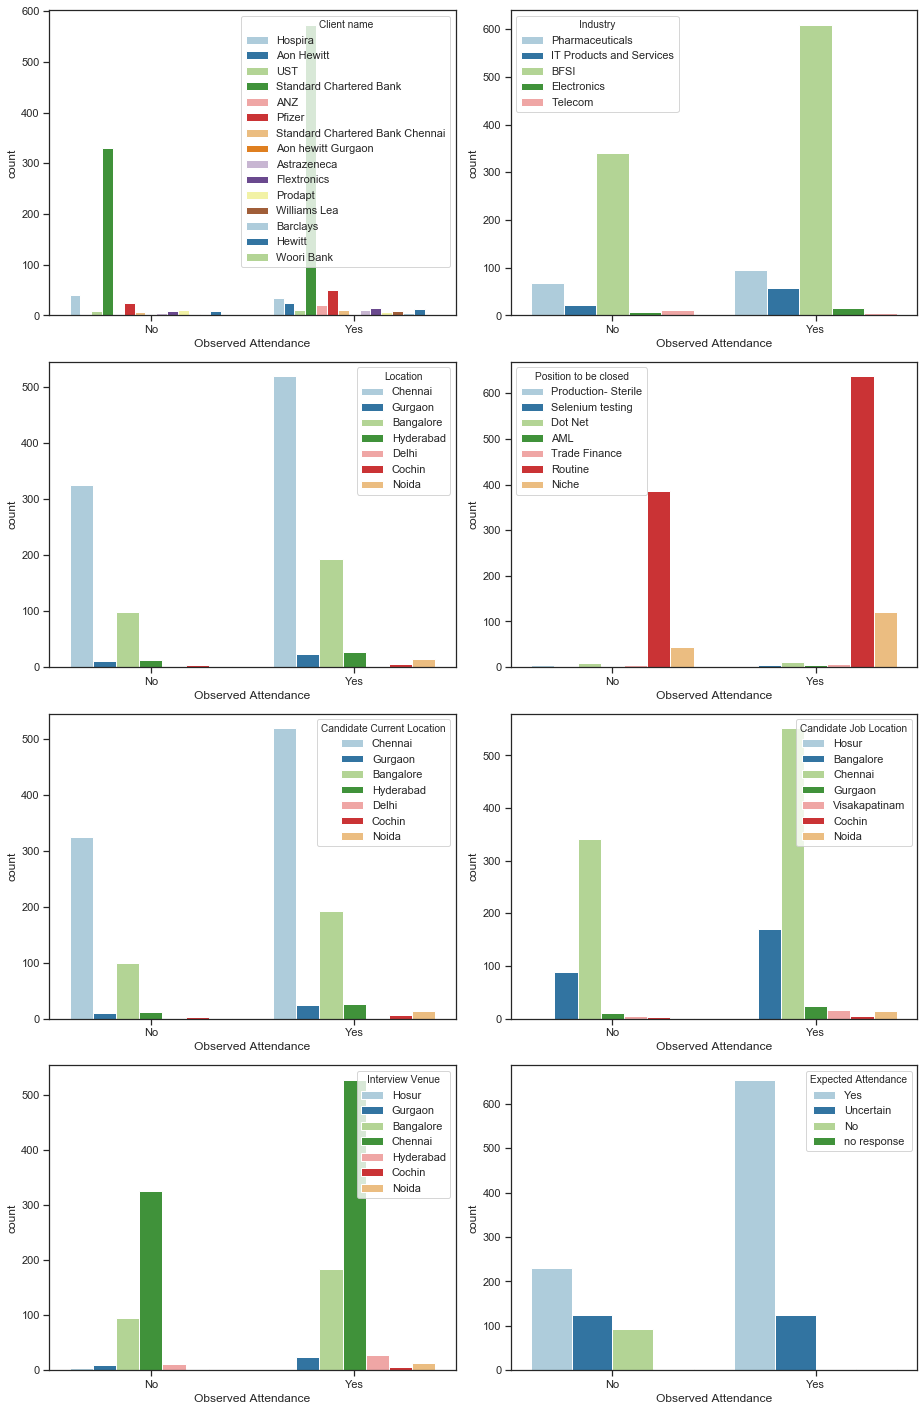

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

fig, axs = plt.subplots(4,2,figsize=(13,20))

sns.countplot(x="Observed Attendance", hue="Client name", data=interview, palette="Paired", ax=axs[0,0])
sns.countplot(x="Observed Attendance", hue="Industry", data=interview, palette="Paired", ax=axs[0,1])
sns.countplot(x="Observed Attendance", hue="Location", data=interview, palette="Paired", ax=axs[1,0])
sns.countplot(x="Observed Attendance", hue="Position to be closed", data=interview, palette="Paired", ax=axs[1,1])
sns.countplot(x="Observed Attendance", hue="Candidate Current Location", data=interview, palette="Paired", ax=axs[2,0])
sns.countplot(x="Observed Attendance", hue="Candidate Job Location", data=interview, palette="Paired", ax=axs[2,1])
sns.countplot(x="Observed Attendance", hue="Interview Venue", data=interview, palette="Paired", ax=axs[3,0])
sns.countplot(x="Observed Attendance", hue="Expected Attendance", data=interview, palette="Paired", ax=axs[3,1])

fig.tight_layout()

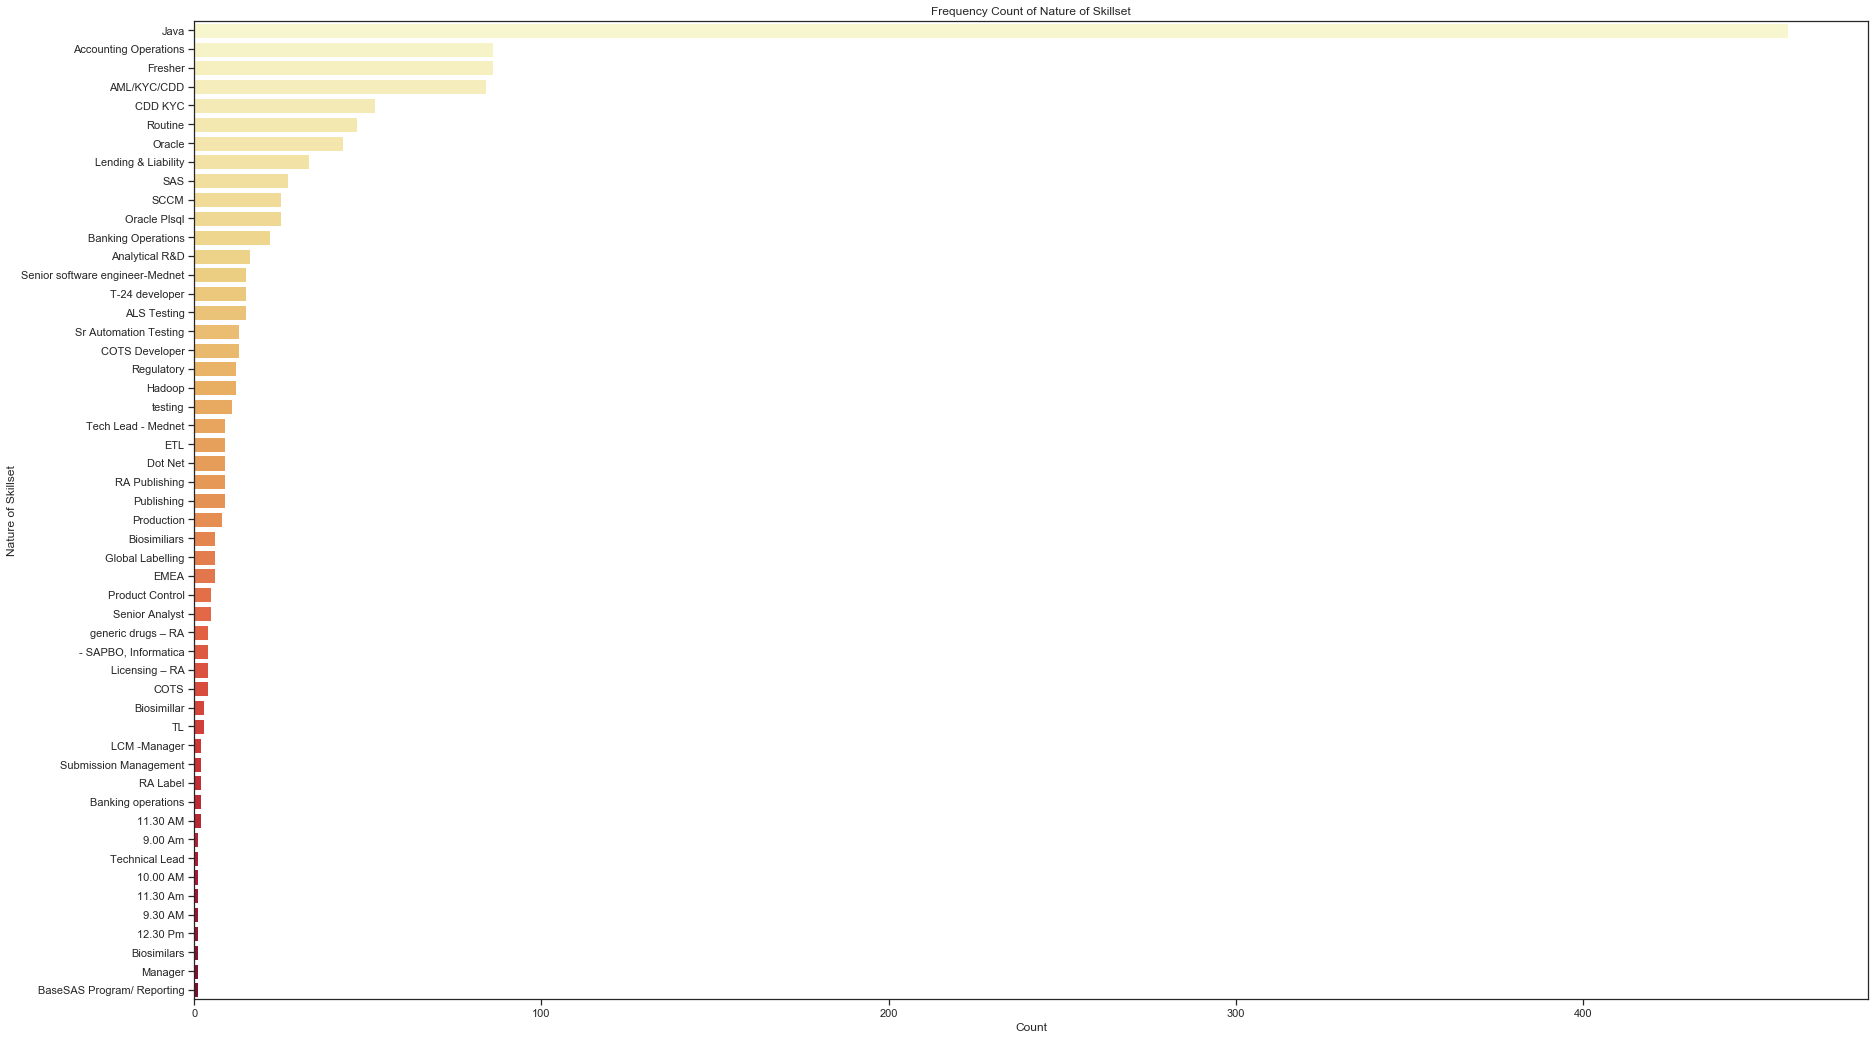

In [29]:
plt.subplots(figsize=(30,18))
sns.countplot(y="Nature of Skillset",
              data=interview, order=interview["Nature of Skillset"].value_counts().index[0:100], palette="YlOrRd")
plt.title("Frequency Count of Nature of Skillset")
plt.xlabel("Count")
plt.show()

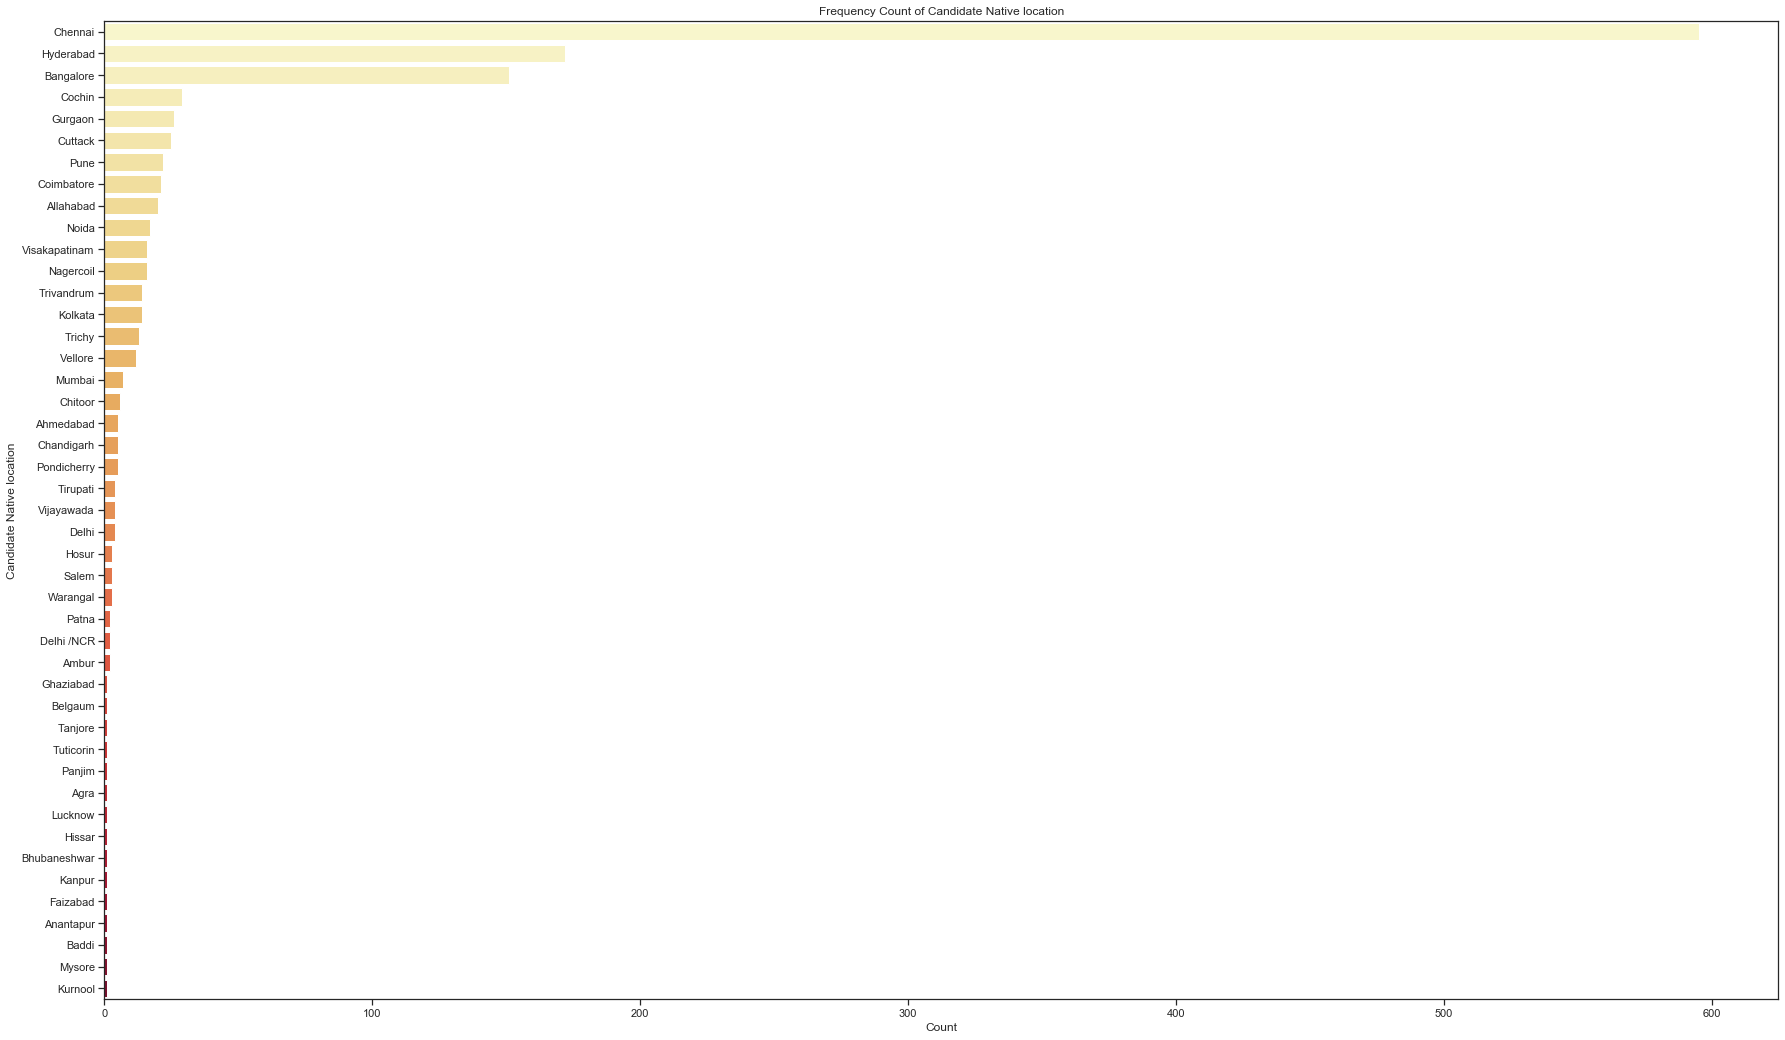

In [30]:
plt.subplots(figsize=(30,18))
sns.countplot(y="Candidate Native location",
              data=interview, order=interview["Candidate Native location"].value_counts().index[0:100], palette="YlOrRd")
plt.title("Frequency Count of Candidate Native location")
plt.xlabel("Count")
plt.show()

### Data transformation
* Transform categorical variables which have more than 2 label names to dummy variables

In [31]:
# List all column names which need to get dummy variable
need_transform_idx =[i for i in interview.select_dtypes('object').columns if(len(interview[i].unique())>2)]
need_transform_idx

['Date of Interview',
 'Client name',
 'Industry',
 'Location',
 'Position to be closed',
 'Nature of Skillset',
 'Name(Cand ID)',
 'Candidate Current Location',
 'Candidate Job Location',
 'Interview Venue',
 'Candidate Native location',
 'Have you obtained the necessary permission to start at the required time',
 'Hope there will be no unscheduled meetings',
 'Can I Call you three hours before the interview and follow up on your attendance for the interview',
 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
 'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
 'Are you clear with the venue details and the landmark.',
 'Has the call letter been shared',
 'Expected Attendance']

In [32]:
# Do not get dummy for Date of Interview and Name(Cand ID) column
need_transform_idx = need_transform_idx[1:6]+need_transform_idx[7:19]
need_transform_idx

['Client name',
 'Industry',
 'Location',
 'Position to be closed',
 'Nature of Skillset',
 'Candidate Current Location',
 'Candidate Job Location',
 'Interview Venue',
 'Candidate Native location',
 'Have you obtained the necessary permission to start at the required time',
 'Hope there will be no unscheduled meetings',
 'Can I Call you three hours before the interview and follow up on your attendance for the interview',
 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
 'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
 'Are you clear with the venue details and the landmark.',
 'Has the call letter been shared',
 'Expected Attendance']

In [33]:
for i in need_transform_idx:
    temp = pd.get_dummies(interview[i], prefix = i)
    interview = pd.concat([interview, temp], axis = 1)
    interview.drop([i], axis = 1, inplace = True)

In [34]:
interview.shape

(1233, 185)

In [35]:
list(interview.columns.values)

['Date of Interview',
 'Interview Type',
 'Name(Cand ID)',
 'Gender',
 'Observed Attendance',
 'Marital Status',
 'Client name_ANZ',
 'Client name_Aon Hewitt',
 'Client name_Aon hewitt Gurgaon',
 'Client name_Astrazeneca',
 'Client name_Barclays',
 'Client name_Flextronics',
 'Client name_Hewitt',
 'Client name_Hospira',
 'Client name_Pfizer',
 'Client name_Prodapt',
 'Client name_Standard Chartered Bank',
 'Client name_Standard Chartered Bank Chennai',
 'Client name_UST',
 'Client name_Williams Lea',
 'Client name_Woori Bank',
 'Industry_BFSI',
 'Industry_Electronics',
 'Industry_IT Products and Services',
 'Industry_Pharmaceuticals',
 'Industry_Telecom',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Cochin',
 'Location_Delhi',
 'Location_Gurgaon',
 'Location_Hyderabad',
 'Location_Noida',
 'Position to be closed_AML',
 'Position to be closed_Dot Net',
 'Position to be closed_Niche',
 'Position to be closed_Production- Sterile',
 'Position to be closed_Routine',
 'Position to

In [36]:
need_transform_idx2 = [i for i in interview.select_dtypes('object').columns if(len(interview[i].unique())>1)]
need_transform_idx2

['Date of Interview',
 'Interview Type',
 'Name(Cand ID)',
 'Gender',
 'Observed Attendance',
 'Marital Status']

In [37]:
for i in need_transform_idx2:
    print(interview.groupby(interview[i])[i].count())
    print("")

Date of Interview
02.09.2016                43
02.12.2015                19
03.04.2015                30
03/06/16                   2
04/12/16                  86
05/02/15                   7
05/11/2016                25
06.02.2016               220
06.05.2016                 3
07.05.2016                31
07.06.2016                12
09-01-2016                15
09.01.2016                 6
10.05.2016                 7
10.5.16                    2
11.05.16                   5
11.5.16                   14
12.04.2016                 1
12.04.2017                 1
12.04.2018                 1
12.04.2019                 1
12.04.2020                 1
12.04.2021                 1
12.04.2022                 1
12.04.2023                 1
13.02.2015                10
13.04.2016                84
13.06.2016                15
13/03/2015                13
14.01.2016                28
                        ... 
28.08.2016 & 09.00 AM      1
28.08.2016 & 09.30 AM      2
28.08.2016 & 10.00 AM    

In [38]:
interview["Interview Type"][interview["Interview Type"] == 'Scheduled'] = 0
interview["Interview Type"][interview["Interview Type"] == 'Walkin'] = 1

interview["Gender"][interview["Gender"] == 'Female'] = 0
interview["Gender"][interview["Gender"] == 'Male'] = 1

interview["Observed Attendance"][interview["Observed Attendance"] == 'No'] = 0
interview["Observed Attendance"][interview["Observed Attendance"] == 'Yes'] = 1
    
interview["Marital Status"][interview["Marital Status"] == 'Married'] = 0
interview["Marital Status"][interview["Marital Status"] == 'Single'] = 1

### Data visualization - 2
* Most of clients prefer to schedule the date of interview
* Most of clients are male
* Most of clients are single
* Based on the pie plot, there are 2/3 clients observed attend the interview and 1/3 clients did not

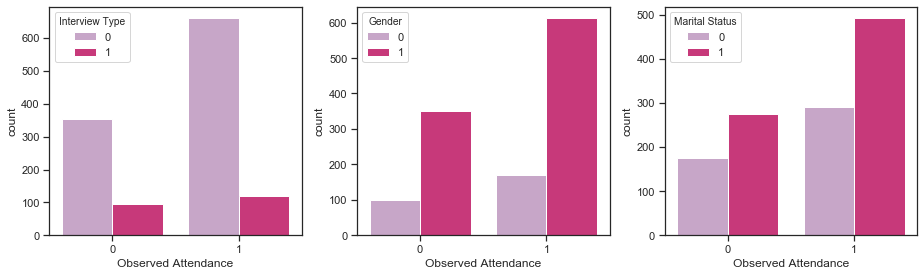

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

fig, axs = plt.subplots(1,3,figsize=(13,4))

sns.countplot(x="Observed Attendance", hue="Interview Type", data=interview, palette="PuRd", ax=axs[0])
sns.countplot(x="Observed Attendance", hue="Gender", data=interview, palette="PuRd", ax=axs[1])
sns.countplot(x="Observed Attendance", hue="Marital Status", data=interview, palette="PuRd", ax=axs[2])

fig.tight_layout()

Text(0.5, 1.0, 'Frequency distribution of interview variable')

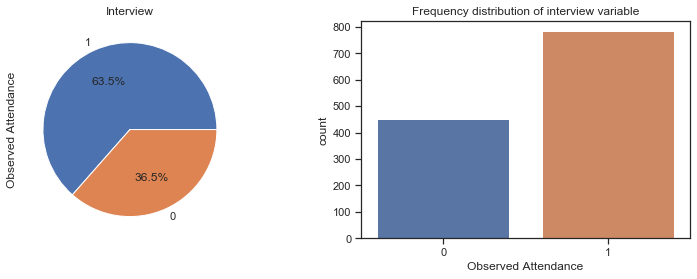

In [40]:
f,ax=plt.subplots(1,2,figsize=(13,4))

ax[0] = interview['Observed Attendance'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Interview')

ax[1] = sns.countplot(x="Observed Attendance", data=interview)
ax[1].set_title("Frequency distribution of interview variable")

In [41]:
for i in interview.columns[0:185]:
    print(interview.groupby([i])[i].count()/interview.shape[0])
    print("")

Date of Interview
02.09.2016               0.034874
02.12.2015               0.015410
03.04.2015               0.024331
03/06/16                 0.001622
04/12/16                 0.069749
05/02/15                 0.005677
05/11/2016               0.020276
06.02.2016               0.178427
06.05.2016               0.002433
07.05.2016               0.025142
07.06.2016               0.009732
09-01-2016               0.012165
09.01.2016               0.004866
10.05.2016               0.005677
10.5.16                  0.001622
11.05.16                 0.004055
11.5.16                  0.011354
12.04.2016               0.000811
12.04.2017               0.000811
12.04.2018               0.000811
12.04.2019               0.000811
12.04.2020               0.000811
12.04.2021               0.000811
12.04.2022               0.000811
12.04.2023               0.000811
13.02.2015               0.008110
13.04.2016               0.068127
13.06.2016               0.012165
13/03/2015               0.010

Nature of Skillset_Tech Lead - Mednet
0    0.992701
1    0.007299
Name: Nature of Skillset_Tech Lead - Mednet, dtype: float64

Nature of Skillset_Technical Lead
0    0.999189
1    0.000811
Name: Nature of Skillset_Technical Lead, dtype: float64

Nature of Skillset_generic drugs – RA
0    0.996756
1    0.003244
Name: Nature of Skillset_generic drugs – RA, dtype: float64

Nature of Skillset_testing
0    0.991079
1    0.008921
Name: Nature of Skillset_testing, dtype: float64

Candidate Current Location_Bangalore
0    0.763179
1    0.236821
Name: Candidate Current Location_Bangalore, dtype: float64

Candidate Current Location_Chennai
0    0.315491
1    0.684509
Name: Candidate Current Location_Chennai, dtype: float64

Candidate Current Location_Cochin
0    0.992701
1    0.007299
Name: Candidate Current Location_Cochin, dtype: float64

Candidate Current Location_Delhi
0    0.999189
1    0.000811
Name: Candidate Current Location_Delhi, dtype: float64

Candidate Current Location_Gurgaon
0    

In [42]:
interview.shape

(1233, 185)

### Classification
* In this dataset, we do not have continue variables so no need to scale dataset
* We want to predict whether candidates will not attend the interview (y= 0)
* The reason we use micro average in our classifications is: the Yes is more than No in Observed attendance, we want to predict candidates will not attend the interview so we need to consider the problem of imbalance between Yes and No

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X=interview.drop(columns=['Date of Interview','Name(Cand ID)','Observed Attendance']).astype(int)
y=interview['Observed Attendance'].astype(int)

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (924, 182)
X_test shape: (309, 182)


In [44]:
# KNN classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,13))
param_grid = dict(n_neighbors=k_range)

grid1 = GridSearchCV(KNeighborsClassifier(), 
                     param_grid, cv =5 , return_train_score= True, iid = False, scoring = 'recall_micro')
grid1.fit(X_train, y_train)
print('The best parameter: {}'.format(grid1.best_params_))
print('The best cross-validation score: {:.4f}'.format(grid1.best_score_))
print(grid1.scorer_)

The best parameter: {'n_neighbors': 11}
The best cross-validation score: 0.6829
make_scorer(recall_score, pos_label=None, average=micro)


In [45]:
import pandas as pd
result = pd.DataFrame(grid1.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010401,0.001353,0.051788,0.004942,1,{'n_neighbors': 1},0.616216,0.643243,0.675676,0.589189,...,0.627691,0.029470,10,0.825440,0.807848,0.817321,0.767253,0.835135,0.810599,0.023469
1,0.010992,0.001879,0.054849,0.002266,2,{'n_neighbors': 2},0.600000,0.578378,0.600000,0.513514,...,0.569248,0.032567,12,0.752368,0.692828,0.694181,0.664411,0.736486,0.708055,0.031941
2,0.011007,0.001665,0.060880,0.004524,3,{'n_neighbors': 3},0.670270,0.659459,0.637838,0.637838,...,0.644994,0.017873,8,0.763194,0.753721,0.733424,0.740189,0.756757,0.749457,0.010983
3,0.010732,0.002464,0.065516,0.006641,4,{'n_neighbors': 4},0.632432,0.616216,0.610811,0.605405,...,0.613625,0.010424,11,0.737483,0.694181,0.690122,0.717185,0.728378,0.713470,0.018600
4,0.010811,0.001930,0.066072,0.007381,5,{'n_neighbors': 5},0.654054,0.681081,0.643243,0.648649,...,0.652579,0.015468,5,0.765900,0.751015,0.709066,0.730717,0.759459,0.743232,0.020793


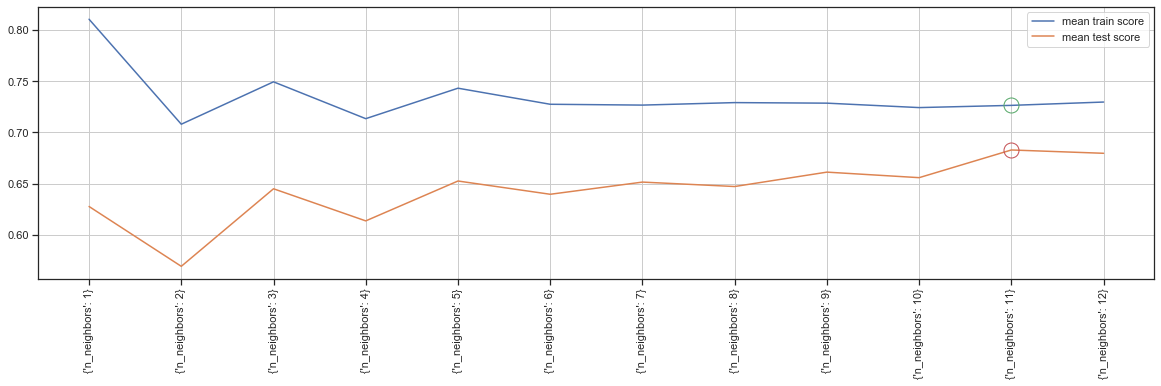

In [46]:
import matplotlib.pyplot as plt
import numpy as np

#Plot the average train and test score for this grid search model.
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid1.best_index_], result['mean_train_score'][grid1.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid1.best_index_], result['mean_test_score'][grid1.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

Text(0, 0.5, 'TPR (Recall)')

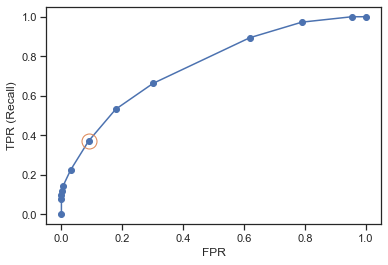

In [47]:
%matplotlib inline
from sklearn.metrics import roc_curve

y_train_pred = grid1.predict_proba(X_train)[:,0]
tpr, fpr, threshold = roc_curve(y_train, y_train_pred)

plt.plot( fpr, tpr, 'o-')
#default thrshold for predict_proba is 0.5
default_index = np.argmin(np.abs(threshold - 0.5))
plt.plot(fpr[default_index], tpr[default_index], 'o', markersize = 15, fillstyle = 'none')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

In [48]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, roc_auc_score

confusion_matrix(y_train, grid1.predict(X_train))

array([[122, 207],
       [ 53, 542]], dtype=int64)

In [49]:
precision_1 = precision_score(y_train, grid1.predict(X_train), average = "micro")
recall_1 = recall_score(y_train, grid1.predict(X_train), average = "micro")
roc_1 = roc_auc_score(y_train, grid1.predict(X_train))

print('Precision score: {:.4f}'.format(precision_1))
print('Recall score: {:.4f}'.format(recall_1))
print('ROC score: {:.4f}'.format(roc_1))

Precision score: 0.7186
Recall score: 0.7186
ROC score: 0.6409


In [50]:
# Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid2 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'liblinear', max_iter = 5000, random_state = 0), 
                     param_grid, cv =5 , return_train_score= True, iid = False, scoring = 'recall_micro')
grid2.fit(X_train, y_train)
print('The best parameter: {}'.format(grid2.best_params_))
print('The best cross-validation score: {:.4f}'.format(grid2.best_score_))
print(grid2.scorer_)

The best parameter: {'C': 0.1}
The best cross-validation score: 0.7175
make_scorer(recall_score, pos_label=None, average=micro)


In [51]:
import pandas as pd
result = pd.DataFrame(grid2.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020154,0.012628,0.003832,0.001452,0.001,{'C': 0.001},0.664865,0.686486,0.659459,0.675676,...,0.672080,0.009329,7,0.676590,0.702300,0.711773,0.668471,0.705405,0.692908,0.017110
1,0.010633,0.001034,0.002799,0.000400,0.01,{'C': 0.01},0.740541,0.681081,0.670270,0.751351,...,0.703431,0.035054,4,0.706360,0.710419,0.709066,0.699594,0.716216,0.708331,0.005428
2,0.011582,0.001354,0.002599,0.000799,0.1,{'C': 0.1},0.713514,0.697297,0.724324,0.745946,...,0.717521,0.016735,1,0.740189,0.742896,0.734777,0.725304,0.739189,0.736471,0.006165
3,0.013429,0.001041,0.003599,0.000800,1,{'C': 1},0.718919,0.697297,0.702703,0.740541,...,0.713196,0.015414,2,0.772666,0.760487,0.764547,0.745602,0.755405,0.759741,0.009049
4,0.018387,0.002652,0.002999,0.000633,10,{'C': 10},0.708108,0.681081,0.691892,0.735135,...,0.705635,0.018483,3,0.780785,0.771313,0.774019,0.757781,0.772973,0.771374,0.007522
5,0.022973,0.003522,0.002214,0.000726,100,{'C': 100},0.681081,0.675676,0.691892,0.724324,...,0.694812,0.017168,5,0.787551,0.775372,0.776725,0.767253,0.775676,0.776515,0.006475
6,0.031740,0.002042,0.002006,0.000011,1000,{'C': 1000},0.681081,0.670270,0.691892,0.724324,...,0.693731,0.018460,6,0.788904,0.774019,0.776725,0.767253,0.774324,0.776245,0.007071


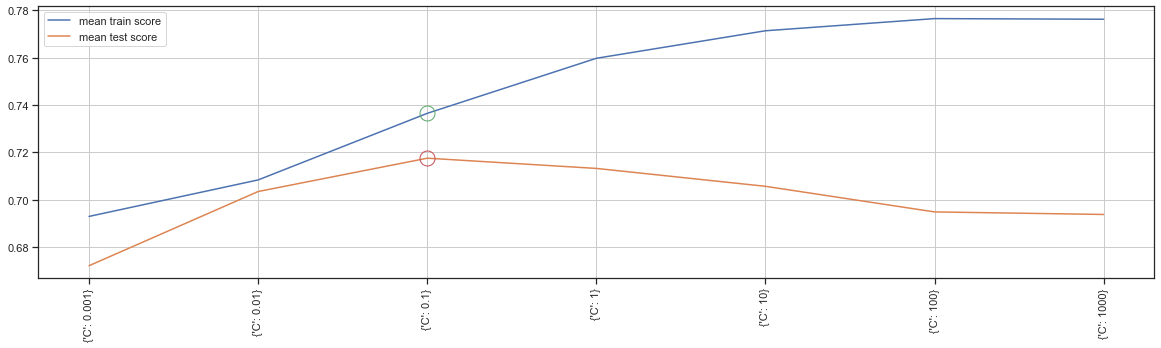

In [52]:
import matplotlib.pyplot as plt
import numpy as np

#Plot the average train and test score for this grid search model.
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid2.best_index_], result['mean_train_score'][grid2.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid2.best_index_], result['mean_test_score'][grid2.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

Text(0, 0.5, 'TPR (Recall)')

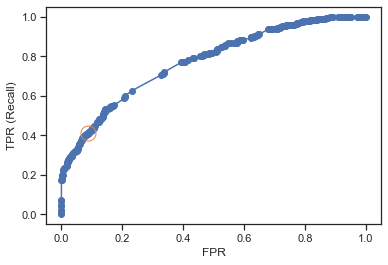

In [53]:
%matplotlib inline
from sklearn.metrics import roc_curve

y_train_pred = grid2.predict_proba(X_train)[:,0]
tpr, fpr, threshold = roc_curve(y_train, y_train_pred)

plt.plot( fpr, tpr, 'o-')
#default thrshold for predict_proba is 0.5
default_index = np.argmin(np.abs(threshold - 0.5))
plt.plot(fpr[default_index], tpr[default_index], 'o', markersize = 15, fillstyle = 'none')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

In [54]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, roc_auc_score

confusion_matrix(y_train, grid2.predict(X_train))

array([[135, 194],
       [ 51, 544]], dtype=int64)

In [55]:
precision_2 = precision_score(y_train, grid2.predict(X_train), average = "micro")
recall_2 = recall_score(y_train, grid2.predict(X_train), average = "micro")
roc_2 = roc_auc_score(y_train, grid2.predict(X_train))

print('Precision score: {:.4f}'.format(precision_2))
print('Recall score: {:.4f}'.format(recall_2))
print('ROC score: {:.4f}'.format(roc_2))

Precision score: 0.7348
Recall score: 0.7348
ROC score: 0.6623


In [56]:
# Linear Support Vector Machine
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid3 = GridSearchCV(LinearSVC(dual = False, max_iter = 5000, random_state = 0), 
                     param_grid, cv =5 , return_train_score= True, iid = False, scoring = 'recall_micro')
grid3.fit(X_train, y_train)
print('The best parameter: {}'.format(grid3.best_params_))
print('The best cross-validation score: {:.4f}'.format(grid3.best_score_))
print(grid3.scorer_)

The best parameter: {'C': 0.01}
The best cross-validation score: 0.7175
make_scorer(recall_score, pos_label=None, average=micro)


In [57]:
import pandas as pd
result = pd.DataFrame(grid3.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011194,0.000748,0.003000,0.000634,0.001,{'C': 0.001},0.735135,0.675676,0.670270,0.751351,...,0.701269,0.034697,4,0.703654,0.709066,0.707713,0.695535,0.714865,0.706166,0.006416
1,0.011394,0.003198,0.003000,0.000633,0.01,{'C': 0.01},0.718919,0.697297,0.718919,0.745946,...,0.717521,0.016382,1,0.741543,0.740189,0.738836,0.726658,0.737838,0.737013,0.005326
2,0.014613,0.002192,0.003587,0.001505,0.1,{'C': 0.1},0.708108,0.686486,0.708108,0.740541,...,0.709953,0.017349,2,0.772666,0.759134,0.764547,0.746955,0.755405,0.759741,0.008635
3,0.017749,0.001594,0.002199,0.000400,1,{'C': 1},0.708108,0.681081,0.691892,0.729730,...,0.703467,0.016466,3,0.780785,0.767253,0.771313,0.761840,0.771622,0.770562,0.006216
4,0.039378,0.010165,0.002200,0.000400,10,{'C': 10},0.681081,0.664865,0.681081,0.724324,...,0.690488,0.020449,6,0.787551,0.771313,0.775372,0.767253,0.775676,0.775433,0.006794
5,0.053143,0.009073,0.003201,0.000751,100,{'C': 100},0.681081,0.664865,0.686486,0.729730,...,0.692650,0.021863,5,0.788904,0.775372,0.775372,0.764547,0.774324,0.775704,0.007757


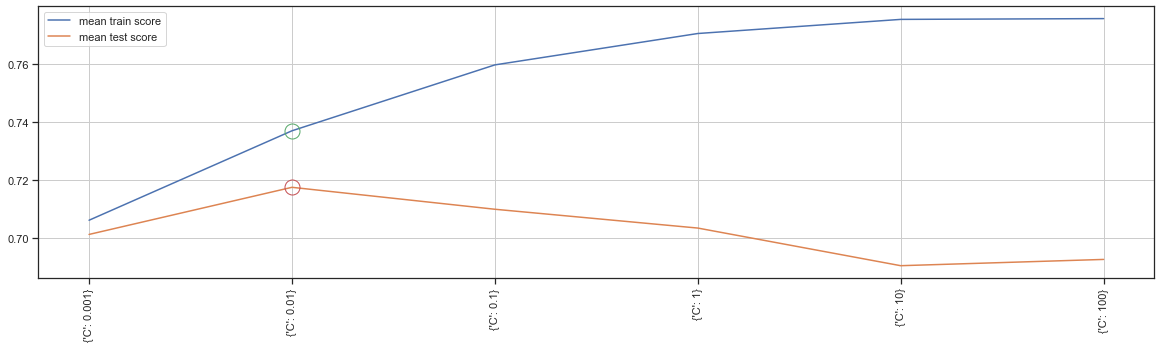

In [58]:
import matplotlib.pyplot as plt
import numpy as np

#Plot the average train and test score for this grid search model.
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid3.best_index_], result['mean_train_score'][grid3.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid3.best_index_], result['mean_test_score'][grid3.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [59]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, roc_auc_score

confusion_matrix(y_train, grid3.predict(X_train))

array([[138, 191],
       [ 54, 541]], dtype=int64)

In [60]:
precision_3 = precision_score(y_train, grid3.predict(X_train), average = "micro")
recall_3 = recall_score(y_train, grid3.predict(X_train), average = "micro")
roc_3 = roc_auc_score(y_train, grid3.predict(X_train))

print('Precision score: {:.4f}'.format(precision_3))
print('Recall score: {:.4f}'.format(recall_3))
print('ROC score: {:.4f}'.format(roc_3))

Precision score: 0.7348
Recall score: 0.7348
ROC score: 0.6643


In [61]:
# Kerenilzed Support Vector Machine (rbf, poly and linear)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ('rbf','poly','linear'),
              'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10],
              'degree': [1, 2]}

grid4 = GridSearchCV(SVC(random_state = 0),
                     param_grid, cv =5 , return_train_score= True, iid = False, scoring = 'recall_micro')
grid4.fit(X_train, y_train)
print('The best parameter: {}'.format(grid4.best_params_))
print('The best cross-validation score: {:.4f}'.format(grid4.best_score_))
print(grid4.scorer_)

The best parameter: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
The best cross-validation score: 0.7240
make_scorer(recall_score, pos_label=None, average=micro)


In [62]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, roc_auc_score

confusion_matrix(y_train, grid4.predict(X_train))

array([[158, 171],
       [ 80, 515]], dtype=int64)

In [63]:
precision_4 = precision_score(y_train, grid4.predict(X_train), average = "micro")
recall_4 = recall_score(y_train, grid4.predict(X_train), average = "micro")
roc_4 = roc_auc_score(y_train, grid4.predict(X_train))

print('Precision score: {:.4f}'.format(precision_4))
print('Recall score: {:.4f}'.format(recall_4))
print('ROC score: {:.4f}'.format(roc_4))

Precision score: 0.7284
Recall score: 0.7284
ROC score: 0.6729


In [64]:
# Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [1, 2, 3, 5, 7, 8, 10]}

grid5 = GridSearchCV(DecisionTreeClassifier(random_state = 0), 
                     param_grid, cv =5 , return_train_score= True, iid = False, scoring = 'recall_micro')
grid5.fit(X_train, y_train)
print('The best parameter: {}'.format(grid5.best_params_))
print('The best cross-validation score: {:.4f}'.format(grid5.best_score_))
print(grid5.scorer_)

The best parameter: {'max_depth': 5}
The best cross-validation score: 0.7175
make_scorer(recall_score, pos_label=None, average=micro)


In [65]:
import pandas as pd
result = pd.DataFrame(grid5.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008713,0.001847,0.002796,0.000398,1,{'max_depth': 1},0.697297,0.708108,0.708108,0.751351,...,0.709929,0.022425,5,0.723951,0.721245,0.730717,0.710419,0.736486,0.724564,0.008848
1,0.007819,0.000417,0.002005,0.000632,2,{'max_depth': 2},0.697297,0.724324,0.708108,0.767568,...,0.716416,0.028685,2,0.723951,0.726658,0.730717,0.715832,0.736486,0.726729,0.006893
2,0.007852,0.000452,0.001797,0.000399,3,{'max_depth': 3},0.697297,0.724324,0.691892,0.767568,...,0.713173,0.030312,3,0.732070,0.726658,0.742896,0.717185,0.737838,0.731329,0.008928
3,0.009385,0.000500,0.001802,0.000401,5,{'max_depth': 5},0.745946,0.708108,0.697297,0.751351,...,0.717497,0.026540,1,0.741543,0.736130,0.751015,0.733424,0.748649,0.742152,0.006835
4,0.011942,0.001093,0.002008,0.000019,7,{'max_depth': 7},0.740541,0.708108,0.686486,0.740541,...,0.709918,0.027292,6,0.757781,0.755074,0.763194,0.749662,0.759459,0.757034,0.004529
5,0.012576,0.003267,0.001795,0.000398,8,{'max_depth': 8},0.729730,0.702703,0.686486,0.745946,...,0.709929,0.024180,4,0.765900,0.763194,0.765900,0.760487,0.763514,0.763799,0.002012
6,0.011610,0.000495,0.001804,0.000402,10,{'max_depth': 10},0.686486,0.702703,0.702703,0.740541,...,0.704530,0.019151,7,0.778078,0.767253,0.782138,0.774019,0.787838,0.777865,0.007002


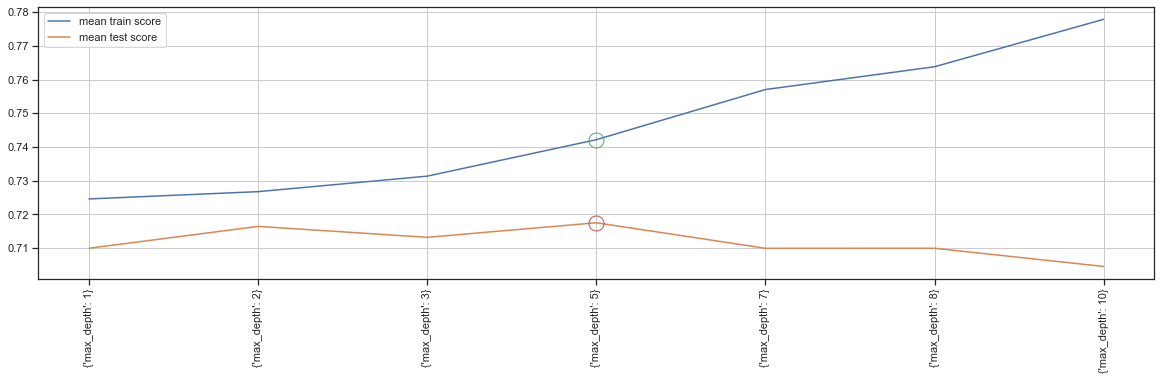

In [66]:
import matplotlib.pyplot as plt
import numpy as np

#Plot the average train and test score for this grid search model.
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid5.best_index_], result['mean_train_score'][grid5.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid5.best_index_], result['mean_test_score'][grid5.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [67]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, roc_auc_score

confusion_matrix(y_train, grid5.predict(X_train))

array([[166, 163],
       [ 78, 517]], dtype=int64)

In [68]:
precision_5 = precision_score(y_train, grid5.predict(X_train), average = "micro")
recall_5 = recall_score(y_train, grid5.predict(X_train), average = "micro")
roc_5 = roc_auc_score(y_train, grid5.predict(X_train))

print('Precision score: {:.4f}'.format(precision_5))
print('Recall score: {:.4f}'.format(recall_5))
print('ROC score: {:.4f}'.format(roc_5))

Precision score: 0.7392
Recall score: 0.7392
ROC score: 0.6867


### Summary

* We want to predict whether candidates will not attend the interview (y= 0)
* According to the report table, the best recall score is 0.7392 and the best model is DecisionTree with max_depth=5

In [69]:
report_table = [['KNN', grid1.best_params_, 
                 grid1.best_score_, 
                 precision_1, recall_1, 
                 roc_1]] + [['Logit', grid2.best_params_, 
                 grid2.best_score_, 
                 precision_2, recall_2, 
                 roc_2]] + [['LinearSVC', grid3.best_params_, 
                 grid3.best_score_, 
                 precision_3, recall_3, 
                 roc_3]] + [['KernelSVC', grid4.best_params_, 
                 grid4.best_score_, 
                 precision_4, recall_4, 
                 roc_4]] + [['DecisionTree', grid5.best_params_, 
                 grid5.best_score_, 
                 precision_5, recall_5, 
                 roc_5]]

In [70]:
report = pd.DataFrame(report_table,
                      columns = ['Model', 'Best parameter',
                                 'Best score', 'Precision score', 
                                 'Recall score', 'ROC score'])
report.index = report.index + 1
report

,Model,Best parameter,Best score,Precision score,Recall score,ROC score
1,KNN,{'n_neighbors': 11},0.682891,0.718615,0.718615,0.640873
2,Logit,{'C': 0.1},0.717521,0.734848,0.734848,0.662310
3,LinearSVC,{'C': 0.01},0.717521,0.734848,0.734848,0.664348
4,KernelSVC,"{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel'...",0.723995,0.728355,0.728355,0.672895
5,DecisionTree,{'max_depth': 5},0.717497,0.739177,0.739177,0.686733


## <font color='purple'> Project 2

In [71]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 11)
knn_clf.fit(X_train, y_train)

log_clf = LogisticRegression(multi_class = 'auto', solver = 'liblinear', max_iter = 5000, C = 0.1, random_state = 0)
log_clf.fit(X_train, y_train)

lsvm_clf = SVC(C = 0.01, degree = 2, kernel = 'linear', probability = True, random_state = 0)
lsvm_clf.fit(X_train, y_train)

svm_clf = SVC(C = 0.1, degree = 2, gamma = 0.1, kernel = 'poly', probability = True, random_state = 0)
svm_clf.fit(X_train, y_train)

dtree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dtree_clf.fit(X_train, y_train)

voting_hard_clf = VotingClassifier(estimators=[('knn', knn_clf), ('lr', log_clf), ('lsvm', lsvm_clf), ('svc', svm_clf), ('dt', dtree_clf)], voting='hard')
voting_hard_clf.fit(X_train, y_train)

voting_soft_clf = VotingClassifier(estimators=[('knn', knn_clf), ('lr', log_clf), ('lsvm', lsvm_clf), ('svc', svm_clf), ('dt', dtree_clf)], voting='soft')
voting_soft_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (knn_clf, log_clf, lsvm_clf, svm_clf ,dtree_clf , voting_hard_clf, voting_soft_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

vh_train_micro_recall = recall_score(y_train, voting_hard_clf.predict(X_train), average = "micro")
vs_train_micro_recall = recall_score(y_train, voting_soft_clf.predict(X_train), average = "micro")
print('Voting hard recall score: {:.4f}'.format(vh_train_micro_recall))
print('Voting soft recall score: {:.4f}'.format(vs_train_micro_recall))

KNeighborsClassifier 0.6019417475728155
LogisticRegression 0.6763754045307443
SVC 0.6504854368932039
SVC 0.656957928802589
DecisionTreeClassifier 0.6537216828478964
VotingClassifier 0.656957928802589
VotingClassifier 0.6537216828478964
Voting hard recall score: 0.7284
Voting soft recall score: 0.7294


In [72]:
# Bagging Classifier for Logistic Regression
from sklearn.ensemble import BaggingClassifier

bag_log_clf = BaggingClassifier(log_clf, random_state = 0, oob_score=True, bootstrap=True)
bag_log_clf.fit(X_train, y_train)
y_pred = bag_log_clf.predict(X_test)
print("== Bagging for Logistic Regression ==")
print('Out-of-bag score: {:.4f}'.format(bag_log_clf.oob_score_))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

# Bagging Classifier for Decision Tree
bag_dtree_clf = BaggingClassifier(dtree_clf, random_state = 0, oob_score=True, bootstrap=True)
bag_dtree_clf.fit(X_train, y_train)
y_pred = bag_dtree_clf.predict(X_test)
print("== Bagging for Decision Tree ==")
print('Out-of-bag score: {:.4f}'.format(bag_dtree_clf.oob_score_))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

# Pasting Classifier for Logistic Regression
pas_log_clf = BaggingClassifier(log_clf, random_state = 0, bootstrap=False)
pas_log_clf.fit(X_train, y_train)
y_pred = pas_log_clf.predict(X_test)
print(" ")
print("== Pasting for Logistic Regression ==")
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

# Pasting Classifier for Decision Tree
pas_dtree_clf = BaggingClassifier(dtree_clf, random_state = 0, bootstrap=False)
pas_dtree_clf.fit(X_train, y_train)
y_pred = pas_dtree_clf.predict(X_test)
print("== Pasting for Decision Tree ==")
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

== Bagging for Logistic Regression ==
Out-of-bag score: 0.7110
Accuracy score: 0.6731
== Bagging for Decision Tree ==
Out-of-bag score: 0.7013
Accuracy score: 0.6634
 
== Pasting for Logistic Regression ==
Accuracy score: 0.6764
== Pasting for Decision Tree ==
Accuracy score: 0.6537


In [73]:
# AdaBoost Classifier for Logistic Regression
from sklearn.ensemble import AdaBoostClassifier

ada_log_clf = AdaBoostClassifier(log_clf, random_state=0)
ada_log_clf.fit(X_train, y_train)
y_pred = ada_log_clf.predict(X_test)
print("AdaBoost for Logistic Regression:")
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

# AdaBoost Classifier for Decision Tree
ada_dtree_clf = AdaBoostClassifier(dtree_clf, random_state=0)
ada_dtree_clf.fit(X_train, y_train)
y_pred = ada_dtree_clf.predict(X_test)
print(" ")
print("AdaBoost for Decision Tree:")
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

AdaBoost for Logistic Regression:
Accuracy score: 0.6375
 
AdaBoost for Decision Tree:
Accuracy score: 0.6246


In [74]:
# Gradient Boosting
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=5, learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("Accuracy on training set: {:.4f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(X_test, y_test)))

Accuracy score: 0.6796
Accuracy on training set: 0.7403
Accuracy on test set: 0.6796


In [75]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print("Explained variance ratio:",np.sum(pca.explained_variance_ratio_))
print("X_reduced shape:",X_reduced.shape)
print("n_components:",pca.n_components_)

Explained variance ratio: 0.9507995305771975
X_reduced shape: (924, 39)
n_components: 39


In [76]:
grid1.fit(X_reduced, y_train)
grid2.fit(X_reduced, y_train)
grid3.fit(X_reduced, y_train)
grid4.fit(X_reduced, y_train)
grid5.fit(X_reduced, y_train)

PCA_precision_1 = precision_score(y_train, grid1.predict(X_reduced), average = "micro")
PCA_precision_1 = precision_score(y_train, grid2.predict(X_reduced), average = "micro")
PCA_precision_1 = precision_score(y_train, grid3.predict(X_reduced), average = "micro")
precision_1 = precision_score(y_train, grid4.predict(X_reduced), average = "micro")
precision_1 = precision_score(y_train, grid5.predict(X_reduced), average = "micro")

PCA_recall_1 = recall_score(y_train, grid1.predict(X_reduced), average = "micro")
PCA_recall_2 = recall_score(y_train, grid2.predict(X_reduced), average = "micro")
PCA_recall_3 = recall_score(y_train, grid3.predict(X_reduced), average = "micro")
PCA_recall_4 = recall_score(y_train, grid4.predict(X_reduced), average = "micro")
PCA_recall_5 = recall_score(y_train, grid5.predict(X_reduced), average = "micro")

PCA_roc_1 = roc_auc_score(y_train, grid1.predict(X_reduced))
PCA_roc_2 = roc_auc_score(y_train, grid2.predict(X_reduced))
PCA_roc_3 = roc_auc_score(y_train, grid3.predict(X_reduced))
PCA_roc_4 = roc_auc_score(y_train, grid4.predict(X_reduced))
PCA_roc_5 = roc_auc_score(y_train, grid5.predict(X_reduced))

In [77]:
report_table2 = [['KNN', grid1.best_params_, 
                 grid1.best_score_, 
                 precision_1, recall_1, 
                 roc_1]] + [['Logit', grid2.best_params_, 
                 grid2.best_score_, 
                 precision_2, recall_2, 
                 roc_2]] + [['LinearSVC', grid3.best_params_, 
                 grid3.best_score_, 
                 precision_3, recall_3, 
                 roc_3]] + [['KernelSVC', grid4.best_params_, 
                 grid4.best_score_, 
                 precision_4, recall_4, 
                 roc_4]] + [['DecisionTree', grid5.best_params_, 
                 grid5.best_score_, 
                 precision_5, recall_5, 
                 roc_5]]

In [78]:
report2 = pd.DataFrame(report_table2,
                      columns = ['Model', 'Best parameter',
                                 'Best score', 'Precision score', 
                                 'Recall score', 'ROC score'])
report2.index = report2.index + 1
### Project-2 Report table
report2

,Model,Best parameter,Best score,Precision score,Recall score,ROC score
1,KNN,{'n_neighbors': 9},0.674230,0.726190,0.718615,0.640873
2,Logit,{'C': 0.1},0.716422,0.734848,0.734848,0.662310
3,LinearSVC,{'C': 0.01},0.717497,0.734848,0.734848,0.664348
4,KernelSVC,"{'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel':...",0.720746,0.728355,0.728355,0.672895
5,DecisionTree,{'max_depth': 1},0.726146,0.739177,0.739177,0.686733


In [79]:
### Project-1 Report table
report

,Model,Best parameter,Best score,Precision score,Recall score,ROC score
1,KNN,{'n_neighbors': 11},0.682891,0.718615,0.718615,0.640873
2,Logit,{'C': 0.1},0.717521,0.734848,0.734848,0.662310
3,LinearSVC,{'C': 0.01},0.717521,0.734848,0.734848,0.664348
4,KernelSVC,"{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel'...",0.723995,0.728355,0.728355,0.672895
5,DecisionTree,{'max_depth': 5},0.717497,0.739177,0.739177,0.686733


### Comparition
    Both of report tables get similar results on precision score, recall score and roc score

In [82]:
# Deep learning with original dataset(without PCA)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# step 1: make the model - no hidden layer
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu')) #input Dense layer
                                                                        #dense: number of neuron, input dimension, connect to each neuron
model.add(Dense(1, activation = 'softmax')) #output layer
                                            #Dense(1): number of columns of y_train
                                            #for classification case, we have to have activation

# step 2: compile the model
model.compile(loss='mse' , optimizer='sgd' , metrics = ['accuracy'])

# step 3: train the model: fit epochs and batch_size
model.fit(X_train, y_train, epochs = 50, batch_size = 10) #Increase epochs or batch_size can close the value of train score and test score

# step 4: evalution
loss_and_metrics = model.evaluate(X_test, y_test) #The test value accuracy

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/50
924/924 [==============================] - 0s 284us/sample - loss: 0.3561 - acc: 0.6439
Epoch 2/50
924/924 [==============================] - 0s 158us/sample - loss: 0.3561 - acc: 0.6439
Epoch 3/50
924/924 [==============================] - 0s 163us/sample - loss: 0.3561 - acc: 0.6439
Epoch 4/50
924/924 [==============================] - 0s 162us/sample - loss: 0.3561 - acc: 0.6439
Epoch 5/50
924/924 [==============================] - 0s 166us/sample - loss: 0.3561 - acc: 0.6439
Epoch 6/50
924/924 [==============================] - 0s 154us/sample - loss: 0.3561 - acc: 0.6439
Epoch 7/50
924/924 [==============================] - 0s 188us/sample - loss: 0.3561 - acc: 0.6439
Epoch 8/50
924/924 [==============================] - 0s 163us/sample - loss: 0.3561 - acc: 0.6439
Epoch 9/50
924/924 [==============================] - 0s 166us/sample - loss: 0.3561 - acc

In [83]:
model.evaluate(X_test, y_test)

309/309 [==============================] - 0s 58us/sample - loss: 0.3916 - acc: 0.6084


[0.39158576119293287, 0.60841423]

In [84]:
model.evaluate(X_train, y_train)

924/924 [==============================] - 0s 52us/sample - loss: 0.3561 - acc: 0.6439


[0.35606060593159167, 0.6439394]